In [ ]:
#!pip install PyMySQL

In [17]:
import vanna as vn

# vn-fca920f85ca94e4dbfbd448d15b3e0bf

In [20]:
from vanna.remote import VannaDefault
print(dir(VannaDefault))

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_dataclass_to_dict', '_extract_python_code', '_get_databases', '_get_information_schema_tables', '_response_language', '_rpc_call', '_sanitize_plotly_code', 'add_ddl', 'add_ddl_to_prompt', 'add_documentation', 'add_documentation_to_prompt', 'add_question_sql', 'add_sql_to_prompt', 'ask', 'assistant_message', 'connect_to_bigquery', 'connect_to_clickhouse', 'connect_to_duckdb', 'connect_to_hive', 'connect_to_mssql', 'connect_to_mysql', 'connect_to_oracle', 'connect_to_postgres', 'connect_to_presto', 'connect_to_snowflake', 'connect_to_sqlite', 'create_function', 'create_model', 'delete_function', 'ex

In [35]:

from vanna.remote import VannaDefault
vn = VannaDefault(model='greatmodelllm', api_key='547841dc7ec443baa328b02d3eb57ec7')
# vn.connect_to_...() # Connect to your database here
vn.connect_to_mysql(host='127.0.0.1', dbname='vision_db', user='root', password='Lucas@123', port=3306)

In [36]:
print(vn.get_models())


['greatmodelllm']


In [33]:
df_information_schema = vn.run_sql("SELECT * FROM INFORMATION_SCHEMA.COLUMNS")

# This will break up the information schema into bite-sized chunks that can be referenced by the LLM
plan = vn.get_training_plan_generic(df_information_schema)
plan


Train on Information Schema: def.calib neumatic
Train on Information Schema: def.calib neumatic_new
Train on Information Schema: def.calib pneumatic
Train on Information Schema: def.calib pneumatic_table
Train on Information Schema: def.calib pneumaticss
Train on Information Schema: def.calib pneumaticsspart
Train on Information Schema: def.calib starter_master
Train on Information Schema: def.calib station_master
Train on Information Schema: def.information_schema ADMINISTRABLE_ROLE_AUTHORIZATIONS
Train on Information Schema: def.information_schema APPLICABLE_ROLES
Train on Information Schema: def.information_schema CHARACTER_SETS
Train on Information Schema: def.information_schema CHECK_CONSTRAINTS
Train on Information Schema: def.information_schema COLLATION_CHARACTER_SET_APPLICABILITY
Train on Information Schema: def.information_schema COLLATIONS
Train on Information Schema: def.information_schema COLUMN_PRIVILEGES
Train on Information Schema: def.information_schema COLUMN_STATISTI

In [34]:
vn.train(plan=plan)

Exception: ('Error adding documentation', {'error': {'code': -32600, 'message': 'User airsmokker@gmail.com not in model greatmodelllm2'}, 'jsonrpc': '2.0'})

In [15]:
vn.train(documentation=
"""
This database includes several tables to track and evaluate trainee performance.  
It stores trainee details, attempts, assigned tasks, signatures, and evaluation summaries  
to assess skill levels and progress in a structured manner.
"""
)

Adding documentation....


Exception: ('Error adding documentation', {'error': {'code': -32600, 'message': 'Invalid Request: No email'}, 'jsonrpc': '2.0'})

In [ ]:
vn.train(ddl="""
    CREATE TABLE tasks_cycle (
    task_id INT AUTO_INCREMENT PRIMARY KEY,
    cc_no VARCHAR(255),
    station_name VARCHAR(255),
    dct VARCHAR(255),
    status_ VARCHAR(255),
    remarks TEXT,
    date_ VARCHAR(255),
    attempt VARCHAR(255),
    actual_score VARCHAR(255),
    demo_line_captain VARCHAR(255),
    demo_trainee VARCHAR(255),
    cycle_achievement VARCHAR(255),
    skill_matrix VARCHAR(255),
    process_name VARCHAR(255),
    signature_by_trainee LONGTEXT,
    signature_by_line_caption VARCHAR(255),
    signature_by_module_controller VARCHAR(255),
    created_at TIMESTAMP DEFAULT CURRENT_TIMESTAMP,
    updated_at TIMESTAMP DEFAULT CURRENT_TIMESTAMP ON UPDATE CURRENT_TIMESTAMP,
    place VARCHAR(100),
    module VARCHAR(100),
    cell VARCHAR(100),
    title_cycle_process_name VARCHAR(100)
)
""")

Adding ddl: 
    CREATE TABLE cycle (
    Task_id INT AUTO_INCREMENT PRIMARY KEY,
    cc_no VARCHAR(255),
    dct VARCHAR(255),
    actual_score VARCHAR(255),
    remarks VARCHAR(255),
    demo_line_captain VARCHAR(100),
    demo_trainee VARCHAR(100),
    skill_matrix VARCHAR(100),
    cycle_achievementt VARCHAR(100),
    sign_by_trainee LONGTEXT,
    sign_by_line_captain VARCHAR(255),
    sign_by_module_controller VARCHAR(255),
    attempt VARCHAR(100),
    cycle_time VARCHAR(100),
    mistakes VARCHAR(100),
    created_at TIMESTAMP DEFAULT CURRENT_TIMESTAMP,
    updated_at TIMESTAMP DEFAULT CURRENT_TIMESTAMP ON UPDATE CURRENT_TIMESTAMP,
    status_ VARCHAR(100),
    process_name VARCHAR(100),
    date VARCHAR(100)
)



'5166805-ddl'

In [17]:
vn.train(ddl="""
    CREATE TABLE memory_details (
    memory_id INT AUTO_INCREMENT PRIMARY KEY,
    cc_no VARCHAR(255),
    process_name VARCHAR(255),
    process_obsevations VARCHAR(255),
    attempts VARCHAR(255),
    mistakes VARCHAR(255),
    heart_test VARCHAR(255),
    data_time VARCHAR(255),
    status_ VARCHAR(255),
    sign_trainee LONGTEXT,
    sign_team_leader VARCHAR(255),
    remarks VARCHAR(255),
    place VARCHAR(100),
    module VARCHAR(100),
    cell VARCHAR(100),
    title_memory_process_name VARCHAR(100)
)
""")

Adding ddl: 
    CREATE TABLE memory_details (
    memory_id INT AUTO_INCREMENT PRIMARY KEY,
    cc_no VARCHAR(255),
    process_name VARCHAR(255),
    process_obsevations VARCHAR(255),
    attempts VARCHAR(255),
    mistakes VARCHAR(255),
    heart_test VARCHAR(255),
    data_time VARCHAR(255),
    status_ VARCHAR(255),
    sign_trainee LONGTEXT,
    sign_team_leader VARCHAR(255),
    remarks VARCHAR(255),
    place VARCHAR(100),
    module VARCHAR(100),
    cell VARCHAR(100),
    title_memory_process_name VARCHAR(100)
)



'5166806-ddl'

In [38]:
# DDL statements 
vn.train(ddl="""
    CREATE TABLE attempts (
    attempts_id INT AUTO_INCREMENT PRIMARY KEY,
    task_id INT,
    attempt_number INT,
    pf_status VARCHAR(255),
    mistakes VARCHAR(255),
    cc_no VARCHAR(100),
    status_ VARCHAR(255),
    Signature_by_Trainee LONGTEXT,
    Signature_by_Process_Coach VARCHAR(255),
    Signature_by_Training_Officer VARCHAR(255),
    cycle_time VARCHAR(255),
    remarks VARCHAR(255),
    date VARCHAR(100),
    place VARCHAR(100),
    BU_table VARCHAR(100)
)
""")

Adding ddl: 
    CREATE TABLE attempts (
    attempts_id INT AUTO_INCREMENT PRIMARY KEY,
    task_id INT,
    attempt_number INT,
    pf_status VARCHAR(255),
    mistakes VARCHAR(255),
    cc_no VARCHAR(100),
    status_ VARCHAR(255),
    Signature_by_Trainee LONGTEXT,
    Signature_by_Process_Coach VARCHAR(255),
    Signature_by_Training_Officer VARCHAR(255),
    cycle_time VARCHAR(255),
    remarks VARCHAR(255),
    date VARCHAR(100),
    place VARCHAR(100),
    BU_table VARCHAR(100)
)



'5738801-ddl'

In [39]:
# DDL statements 
vn.train(ddl="""
    CREATE TABLE examine_details (
    si_no INT AUTO_INCREMENT PRIMARY KEY,
    topics VARCHAR(255),
    cc_no VARCHAR(100),
    actual_score VARCHAR(255),
    status_ VARCHAR(255),
    sign_by_trainee LONGTEXT,
    sign_by_training_officer LONGTEXT,
    Remarks VARCHAR(255),
    date VARCHAR(100),
    place VARCHAR(100),
    faculty_name VARCHAR(100),
    day_one VARCHAR(100),
    day_two VARCHAR(100),
    day_three VARCHAR(100),
    entry_date VARCHAR(100)
)
""")

Adding ddl: 
    CREATE TABLE examine_details (
    si_no INT AUTO_INCREMENT PRIMARY KEY,
    topics VARCHAR(255),
    cc_no VARCHAR(100),
    actual_score VARCHAR(255),
    status_ VARCHAR(255),
    sign_by_trainee LONGTEXT,
    sign_by_training_officer LONGTEXT,
    Remarks VARCHAR(255),
    date VARCHAR(100),
    place VARCHAR(100),
    faculty_name VARCHAR(100),
    day_one VARCHAR(100),
    day_two VARCHAR(100),
    day_three VARCHAR(100),
    entry_date VARCHAR(100)
)



'5739027-ddl'

In [15]:
vn.train(ddl="""
    CREATE TABLE registration (
    si_no INT AUTO_INCREMENT PRIMARY KEY,
    name_ VARCHAR(255),
    cc_no INT,
    designation VARCHAR(255),
    date_of_joining VARCHAR(100),
    grade VARCHAR(10),
    year_passed_out INT,
    college_name VARCHAR(255),
    branch VARCHAR(50),
    qualification VARCHAR(50),
    photo LONGTEXT,
    status_ VARCHAR(255),
    existing_cc_no VARCHAR(255),
    is_existing VARCHAR(255)
)
""")

Adding ddl: 
    CREATE TABLE registration (
    si_no INT AUTO_INCREMENT PRIMARY KEY,
    name_ VARCHAR(255),
    cc_no INT,
    designation VARCHAR(255),
    date_of_joining VARCHAR(100),
    grade VARCHAR(10),
    year_passed_out INT,
    college_name VARCHAR(255),
    branch VARCHAR(50),
    qualification VARCHAR(50),
    photo LONGTEXT,
    status_ VARCHAR(255),
    existing_cc_no VARCHAR(255),
    is_existing VARCHAR(255)
)



'5166279-ddl'

Adding documentation....


'3312594-doc'

In [19]:
vn.train(
    question="How many trainees totally registered?",
    sql="""SELECT count(*) 
    FROM registration"""
    )

'6c9cdff91badc0929aec2e1f76c6eca5-sql'

In [22]:
from datetime import date

today_date = date.today().strftime('%Y-%m-%d')

vn.train(
    question="How many trainees totally registered today?",
    sql=f"""SELECT count(*) 
    FROM registration 
    WHERE date_of_joining = '{today_date}'"""
)

'4dfc75843e2c4ed188cbb47603cc03a3-sql'

In [5]:
from datetime import date

today_date = date.today().strftime('%Y-%m-%d')
cc_no = 52753  # Define the trainee CC number

vn.train(
    question="In basic induction, has the trainee with CC No. 52753 passed or not?",
    sql=f"""SELECT cc_no, status_ 
    FROM vision_db.examine_details 
    WHERE cc_no = {cc_no};"""
)


'07b1175cb8597e29705a89b0e795eac1-sql'

In [ ]:
cc_no = 52753  # Define the trainee CC number

vn.train(
    question="In basic induction, has the trainee with CC No. 13012 passed or not in topics of 'About Lucas TVS (Customers/Products/Policies)?",
    sql=f"""SELECT topics, cc_no,status_
    FROM vision_db.examine_details 
    WHERE status_ = 'Fail' and cc_no = '52753' and topics ='About Lucas TVS (Customers/Products/Policies)'"""
)


'341a0ea84c71af3527b2de28ce8d1583-sql'

In [ ]:
 # Define the trainee CC number

vn.train(
    question="In basic induction, has the trainee with CC No. 13012 passed or not in topics is 'About Lucas TVS (Customers/Products/Policies)?",
    sql=f"""SELECT topics, cc_no,status_
    FROM vision_db.examine_details 
    WHERE status_ = 'Fail' and cc_no = '52753' and topics ='About Lucas TVS (Customers/Products/Policies)'"""
)

In [8]:
vn.train(
    question="In basic induction or day1, has the trainee with CC No. 13012 passed or not in topics is 'OHSAS & EMS",
    sql=f"""SELECT topics, cc_no,status_
    FROM vision_db.examine_details 
    WHERE status_ = 'Fail' and cc_no = '52753' and topics ='About Lucas TVS (Customers/Products/Policies)'"""
)

'41e9f8300b79d4064a9c9194f7dbf016-sql'

In [10]:
vn.train(
    question="In basic induction, has the trainee with CC No. 13012 passed or not in the topic 'Awareness of Quality'?",
    sql=f"""SELECT topics, cc_no, status_
    FROM vision_db.examine_details 
    WHERE cc_no = '13012' AND topics = 'Awareness of Quality';"""
)


'581b5399afc7fcaffefe4a016e5f1aa8-sql'

In [ ]:
vn.train(
    question="In basic induction, has the trainee with CC No. 13012 passed or not in the topic 'Awareness of Quality'?",
    sql=f"""SELECT topics, cc_no, status_
    FROM vision_db.examine_details 
    WHERE cc_no = '13012' AND topics = 'Awareness of Quality';"""
)


In [ ]:
vn.train(
    question="In basic induction or day1, has the trainee with CC No. 13012 passed or not in the topic 'Awareness of Quality'?",
    sql=f"""SELECT r.cc_no, r.name_, COUNT(md.status_) AS pass_count 
FROM registration r 
JOIN examine_details md ON r.cc_no = md.cc_no 
WHERE md.topics = 'Awareness of Quality' AND md.status_ = 'Pass' 
GROUP BY r.cc_no, r.name_"""
)

In basic induction, has the trainee with CC No. 13589 is status of all topics if status is all pass give it as pass else he is fail
how of them aree pass in topic Awareness of Quality give cc_no and give the name but take the name from registration table

SELECT r.cc_no, r.name_, COUNT(md.status_) AS pass_count 
FROM registration r 
JOIN memory_details md ON r.cc_no = md.cc_no 
WHERE md.topics = 'Awareness of Quality' AND md.status_ = 'Pass' 
GROUP BY r.cc_no, r.name_

#Above is for day1 and in basic induction ===================== ===    ===========================

#Above is for day4 and Dextery exercise =====================   ===    ==========================

In [23]:
vn.train(
    question="In Dexterity exercise or day4, average pass in which attempts",
    sql=f"""SELECT attempt_number,pf_status,count(attempt_number) AS c
FROM attempts  where  pf_status = 'Pass'
GROUP BY attempt_number"""
)

'd046cdfa7218282951f95fc64fdff235-sql'

In [24]:
vn.train(
    question="In Dexterity exercise or day4, cc_no 52753 status passed or not",
    sql=f"""SELECT attempt_number, status_
FROM attempts  where  cc_no = '52753' 
"""
)

'a5a2b8b7b33ace3b2ea198e8b9a665d6-sql'

In [27]:
vn.train(
    question="In Dexterity exercise or day4, cc_no 52753 status passed or not in all,If all are pass give rsult as pass",
    sql=f"""SELECT 
    CASE 
        WHEN COUNT(CASE WHEN status_ = 'Pass' THEN 1 END) = COUNT(*) THEN 'Pass' 
        ELSE 'Fail' 
    END AS overall_status 
FROM assembly 
WHERE cc_no = '52753'
"""
)

'b6462d17315035f0138ad71374213c99-sql'

In [ ]:
vn.train(
    question="In Dexterity exercise or day4, cc_no 52753 status passed or not in all,If all are pass give rsult as pass give the name of the cc_no",
    sql=f"""SELECT r.name,
    CASE 
        WHEN COUNT(CASE WHEN status_ = 'Pass' THEN 1 END) = COUNT(*) THEN 'Pass' 
        ELSE 'Fail' 
    END AS overall_status 
FROM assembly AS a join  registration AS r ON a.cc_no = r.cc_no
WHERE a.cc_no = '52753'
"""
)

#Day 5 part1 queries

In [3]:
vn.train(
    question="In Ji memory  exercise or day5 first half, cc_no 52753 status passed or not",
    sql=f"""SELECT attempts,mistakes, status_
FROM memory_details  where  cc_no = '52753' 
"""
)

'9b431ec88cd41f8352934131f0a64dbb-sql'

In [4]:
vn.train(
    question="In Ji memory exercise (day 5 first half), did cc_no 52753 pass or not?",
    sql=f"""SELECT attempts, mistakes, status_
FROM memory_details WHERE cc_no = '52753' 
"""
)


'f5b07d7b1b71ad6f7b6d55e9d5815381-sql'

In [6]:
vn.train(
    question="In the Ji memory exercise (Day 5, first half), did cc_no 52753 pass in all attempts overall?",
    sql=f"""SELECT r.name_,
    CASE 
        WHEN COUNT(CASE WHEN m.status_ = 'Pass' THEN 1 END) = COUNT(*) THEN 'Pass'
        ELSE 'Fail'
    END AS OVERALL_RESULT 
    FROM memory_details AS m 
    JOIN registration AS r ON m.cc_no = r.cc_no
    WHERE m.cc_no = '52753'  
    GROUP BY r.name_
"""
)


'd9421d6a8a03324a602a44bb298977cb-sql'

In [7]:
vn.train(
    question="In the Ji memory exercise (Day 5, first half), who are all pass and fail",
    sql=f"""SELECT r.name_,
    CASE 
        WHEN COUNT(CASE WHEN m.status_ = 'Pass' THEN 1 END) = COUNT(*) THEN 'Pass'
        ELSE 'Fail'
    END AS OVERALL_RESULT 
    FROM memory_details AS m 
    JOIN registration AS r ON m.cc_no = r.cc_no 
    GROUP BY r.name_
"""
)

'b2fc3509782c1826cbaf2059f142d376-sql'

In [8]:
vn.train(
    question="In the Ji memory exercise (Day 5, first half), find max mistakes of all the person",
    sql=f"""SELECT r.name_,
     max(m.mistakes) AS Max_mistakes
    FROM memory_details AS m 
    JOIN registration AS r ON m.cc_no = r.cc_no 
    GROUP BY r.name_
    
"""
)

'0fc66bc4b8848421bdb46cfbee987401-sql'

In [9]:
vn.train(
    question="In the cycle time achievement (Day 5, second half), cc_no is 13012 ,give the status ",
    sql=f"""SELECT t.status_,r.name_
    FROM tasks_cycle AS t 
    JOIN registration AS r ON t.cc_no = r.cc_no WHERE t.cc_no = '52753'"""
)

'1ede503424234f2925a7019e4bd651fd-sql'

In [ ]:
vn.train(
    question="Give the status for all in the cycle time achievement",
    sql=f"""SELECT t.status_,r.name_
    FROM tasks_cycle AS t 
    JOIN registration AS r ON t.cc_no = r.cc_no"""
)

'1048e770ed4202219211630e84363150-sql'

In [13]:
vn.train(
    question="In the cycle time achievement give the status ",
    sql=f"""SELECT status_, cc_no
    FROM tasks_cycle WHERE cc_no = '52753'"""
)

'63191ac9a3f70806b4e3fc80f654bf05-sql'

In [12]:
vn.train(
    question="In the cycle time achievement (Day 5, second half), cc_no is 13012 ,give the status ",
    sql=f"""SELECT status_, cc_no
    FROM tasks_cycle WHERE cc_no = '52753'"""
)

'1ede503424234f2925a7019e4bd651fd-sql'

In [11]:
vn.train(
    question="Give the status for all in the cycle time achievement ",
    sql=f"""SELECT t.status_,r.name_
    FROM tasks_cycle AS t 
    JOIN registration AS r ON t.cc_no = r.cc_no"""
)

'61e03e1db29c70a5b6f8213771e47b55-sql'

In [8]:
vn.train(
    question="In the cycle time achievement (Day 5, second half),give the status",
    sql=f"""SELECT status_, cc_no
    FROM tasks_cycle"""
)

'acb19239f6f71ed41035ce6e53cf51b0-sql'

In [9]:
vn.train(
    question="In the cycle time achievement (Day 5, second half),give the status for cc_no is 13012",
    sql=f"""SELECT status_, cc_no
    FROM tasks_cycle WHERE cc_no = '52753'"""
)

'22c11e700d9450b95f31fb0f956dbcaa-sql'

In [ ]:
vn.train(
    question="In the cycle time achievement (Day 5, second half), cc_no is 13012 ,give the status ",
    sql=f"""SELECT status_, cc_no
    FROM tasks_cycle WHERE cc_no = '52753'"""
)

#### checking overall table status

In [4]:
vn.train(
    question="Give the status for all all the tabe for all",
    sql=f"""SELECT e.cc_no,
CASE
	WHEN count(CASE WHEN e.status_ = 'Pass' THEN 1 END ) = count(*) THEN 'Pass'
    ELSE 'Fail'
    END AS Basic_Induction_Trainee,
CASE 
	WHEN count(CASE WHEN a.status_ = 'Pass' THEN 1 END) = count(*) THEN 'Pass'
    ELSE 'Fail'
    END AS Dexterity_Excercise,
CASE 
	WHEN count(CASE WHEN m.status_ = 'Pass' THEN 1 END) = count(*) THEN 'Pass'
    ELSE 'Fail'
    END AS Ji_memory_test,
CASE 
	WHEN count(CASE WHEN t.status_ = 'Pass' THEN 1 END) = count(*) THEN 'Pass'
    ELSE 'Fail'
    END AS Cycle_time_achievement
 FROM examine_details AS e JOIN  attempts AS a  JOIN memory_details AS m  JOIN tasks_cycle AS t 
 on e.cc_no = a.cc_no  and e.cc_no = m.cc_no and e.cc_no = t.cc_no
 GROUP BY e.cc_no;"""
)

'724d472706a6837a92861a1a5cf6c832-sql'

In [ ]:
vn.train(
    question="What is the overall pass/fail status in all tables (Basic Induction Trainee, Dexterity Exercise, Ji Memory Test, Cycle Time Achievement) for the candidate with cc_no 52753",
    sql=f"""SELECT e.cc_no,
CASE
	WHEN count(CASE WHEN e.status_ = 'Pass' THEN 1 END ) = count(*) THEN 'Pass'
    ELSE 'Fail'
    END AS Basic_Induction_Trainee,
CASE 
	WHEN count(CASE WHEN a.status_ = 'Pass' THEN 1 END) = count(*) THEN 'Pass'
    ELSE 'Fail'
    END AS Dexterity_Excercise,
CASE 
	WHEN count(CASE WHEN m.status_ = 'Pass' THEN 1 END) = count(*) THEN 'Pass'
    ELSE 'Fail'
    END AS Ji_memory_test,
CASE 
	WHEN count(CASE WHEN t.status_ = 'Pass' THEN 1 END) = count(*) THEN 'Pass'
    ELSE 'Fail'
    END AS Cycle_time_achievement
 FROM examine_details AS e JOIN  attempts AS a  JOIN memory_details AS m  JOIN tasks_cycle AS t 
 on e.cc_no = a.cc_no  and e.cc_no = m.cc_no and e.cc_no = t.cc_no
 WHERE e.cc_no = '52753'
 GROUP BY e.cc_no;"""
)

'34d77aa66c3be66d8faa53e9ace58e72-sql'

In [6]:
vn.train(
    question="Give the status of all tests for cc_no 52753",
    sql=f"""SELECT e.cc_no,
CASE
	WHEN count(CASE WHEN e.status_ = 'Pass' THEN 1 END ) = count(*) THEN 'Pass'
    ELSE 'Fail'
    END AS Basic_Induction_Trainee,
CASE 
	WHEN count(CASE WHEN a.status_ = 'Pass' THEN 1 END) = count(*) THEN 'Pass'
    ELSE 'Fail'
    END AS Dexterity_Excercise,
CASE 
	WHEN count(CASE WHEN m.status_ = 'Pass' THEN 1 END) = count(*) THEN 'Pass'
    ELSE 'Fail'
    END AS Ji_memory_test,
CASE 
	WHEN count(CASE WHEN t.status_ = 'Pass' THEN 1 END) = count(*) THEN 'Pass'
    ELSE 'Fail'
    END AS Cycle_time_achievement
 FROM examine_details AS e JOIN  attempts AS a  JOIN memory_details AS m  JOIN tasks_cycle AS t 
 on e.cc_no = a.cc_no  and e.cc_no = m.cc_no and e.cc_no = t.cc_no
 WHERE e.cc_no = '52753'
 GROUP BY e.cc_no;"""
)

'ec48e7f42c774e046d3c611c55054c8b-sql'

In [ ]:
vn.train(
    question="",
    sql=f"""SELECT e.cc_no,
CASE
	WHEN count(CASE WHEN e.status_ = 'Pass' THEN 1 END ) = count(*) THEN 'Pass'
    ELSE 'Fail'
    END AS Basic_Induction_Trainee,
CASE 
	WHEN count(CASE WHEN a.status_ = 'Pass' THEN 1 END) = count(*) THEN 'Pass'
    ELSE 'Fail'
    END AS Dexterity_Excercise,
CASE 
	WHEN count(CASE WHEN m.status_ = 'Pass' THEN 1 END) = count(*) THEN 'Pass'
    ELSE 'Fail'
    END AS Ji_memory_test,
CASE 
	WHEN count(CASE WHEN t.status_ = 'Pass' THEN 1 END) = count(*) THEN 'Pass'
    ELSE 'Fail'
    END AS Cycle_time_achievement
 FROM examine_details AS e JOIN  attempts AS a  JOIN memory_details AS m  JOIN tasks_cycle AS t 
 on e.cc_no = a.cc_no  and e.cc_no = m.cc_no and e.cc_no = t.cc_no
 WHERE e.cc_no = '52753'
 GROUP BY e.cc_no;"""
)

'33261b0c6d3a76c9354d599034c446c0-sql'

SQL Prompt: [{'role': 'system', 'content': "You are a SQL expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \n\n    CREATE TABLE attempts (\n    attempts_id INT AUTO_INCREMENT PRIMARY KEY,\n    task_id INT,\n    attempt_number INT,\n    pf_status VARCHAR(255),\n    mistakes VARCHAR(255),\n    cc_no VARCHAR(100),\n    status_ VARCHAR(255),\n    Signature_by_Trainee LONGTEXT,\n    Signature_by_Process_Coach VARCHAR(255),\n    Signature_by_Training_Officer VARCHAR(255),\n    cycle_time VARCHAR(255),\n    remarks VARCHAR(255),\n    date VARCHAR(100),\n    place VARCHAR(100),\n    BU_table VARCHAR(100)\n)\n\n\n\n    CREATE TABLE examine_details (\n    si_no INT AUTO_INCREMENT PRIMARY KEY,\n    topics VARCHAR(255),\n    cc_no VARCHAR(100),\n    actual_score VARCHAR(255),\n    status_ VARCHAR(255),\n    sign_by_trainee LONGTEXT,\n    sign_by_trainin

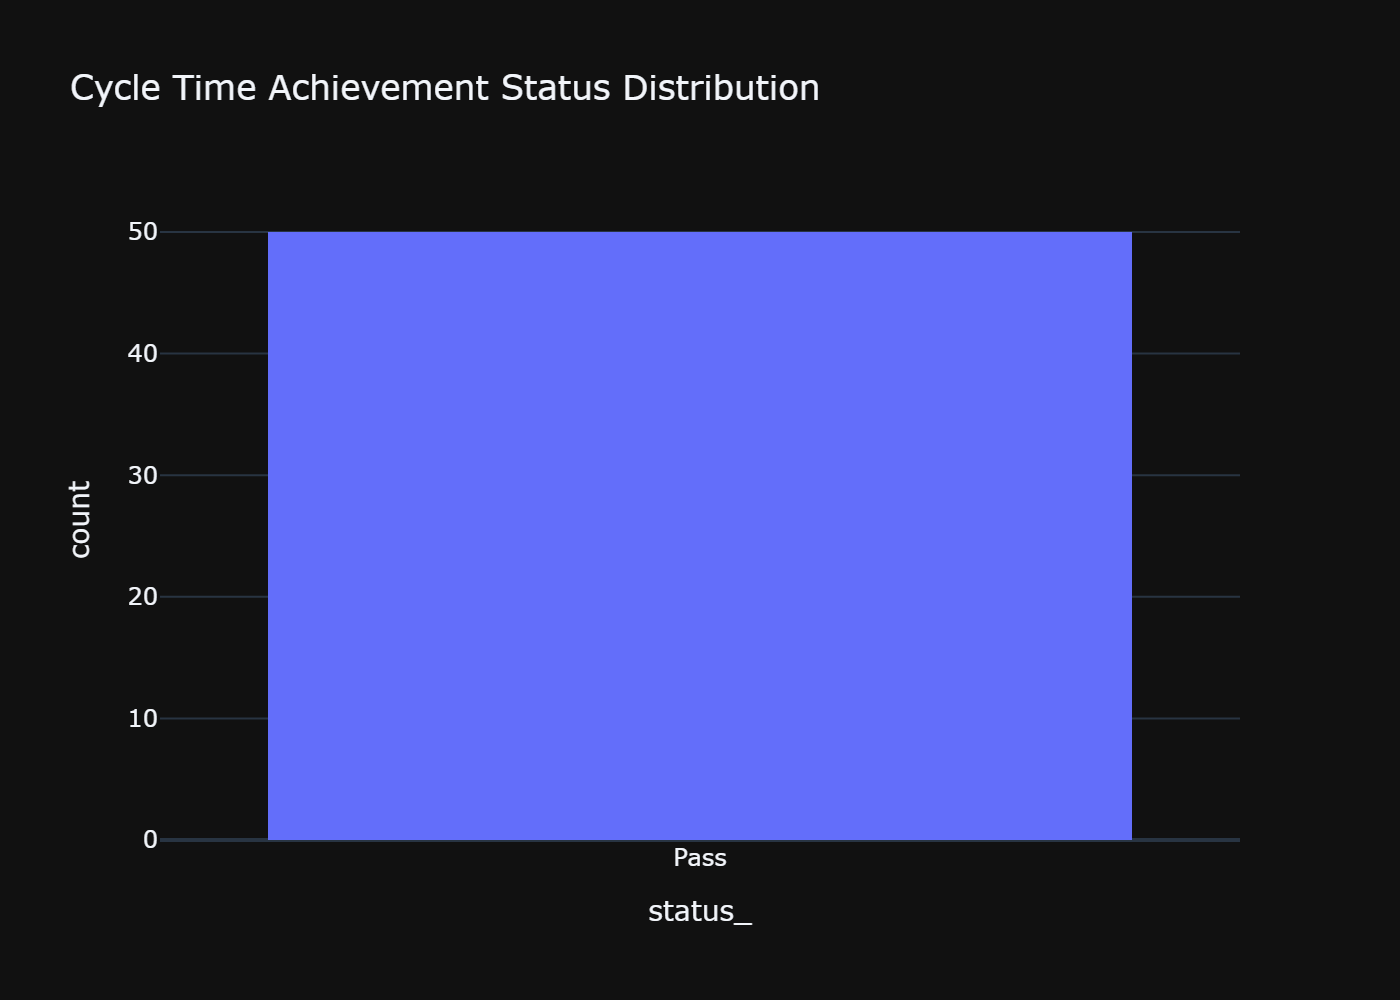

("SELECT status_ \nFROM attempts \nWHERE cc_no = '52753';",
    status_
 0     Pass
 1     Pass
 2     Pass
 3     Pass
 4     Pass
 5     Pass
 6     Pass
 7     Pass
 8     Pass
 9     Pass
 10    Pass
 11    Pass
 12    Pass
 13    Pass
 14    Pass
 15    Pass
 16    Pass
 17    Pass
 18    Pass
 19    Pass
 20    Pass
 21    Pass
 22    Pass
 23    Pass
 24    Pass
 25    Pass
 26    Pass
 27    Pass
 28    Pass
 29    Pass
 30    Pass
 31    Pass
 32    Pass
 33    Pass
 34    Pass
 35    Pass
 36    Pass
 37    Pass
 38    Pass
 39    Pass
 40    Pass
 41    Pass
 42    Pass
 43    Pass
 44    Pass
 45    Pass
 46    Pass
 47    Pass
 48    Pass
 49    Pass,
 Figure({
     'data': [{'bingroup': 'x',
               'hovertemplate': 'status_=%{x}<br>count=%{y}<extra></extra>',
               'legendgroup': '',
               'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
               'name': '',
               'orientation': 'v',
               'showlegend': False,
   

In [10]:
vn.ask("Give cycle time achievement status")


In [37]:
train_df = vn.get_training_data()
train_df

,id,training_data_type,question,content
0,1048033-sql,sql,"In Dexterity exercise or day4, cc_no 52753 sta...",SELECT \n CASE \n WHEN COUNT(CASE WH...
1,1047960-sql,sql,"In basic induction, has the trainee with CC No...","SELECT topics, cc_no,status_\n FROM vision_..."
2,1048247-sql,sql,"In Ji memory exercise or day5 first half, cc_...","SELECT attempts,mistakes, status_\nFROM memory..."
3,1046738-sql,sql,How many trainees totally registered today?,SELECT count(*) \n FROM registration \n ...
4,1050227-sql,sql,"In the cycle time achievement (Day 5, second h...",SELECT status_ \nFROM attempts \nWHERE cc_no =...
5,1050221-sql,sql,Give the status of all tests for cc_no 52753,"SELECT e.cc_no,\nCASE\n\tWHEN count(CASE WHEN ..."
6,1047965-sql,sql,"In basic induction, has the trainee with CC No...","SELECT topics, cc_no, status_\n FROM vision..."
7,1047963-sql,sql,"In basic induction, has the trainee with CC No...","SELECT topics, cc_no, status_\n FROM vision..."
8,1050226-sql,sql,"In the Ji memory exercise (Day 5, first half),...",SELECT status_ \nFROM memory_details \nWHERE c...
9,5739027-ddl,ddl,None,\n CREATE TABLE examine_details (\n si_n...


In [37]:
train_df[train_df['training_data_type']=='ddl']

,id,training_data_type,question,content
22,5166279-ddl,ddl,None,\n CREATE TABLE registration (\n si_no I...
28,5166806-ddl,ddl,None,\n CREATE TABLE memory_details (\n memor...


In [34]:
vn.remove_training_data(id='5166805-ddl')

True